<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/MLLab4_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
credit_df = pd.read_csv( "GermanCredit.csv")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
x_features=list(credit_df.columns)
x_features.remove( 'credit_risk')
x_features

['status',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker']

In [ ]:
encoded_credit_df=pd.get_dummies(credit_df[x_features], drop_first=True)
list(encoded_credit_df.columns)


['duration',
 'amount',
 'installment_rate',
 'present_residence',
 'age',
 'number_credits',
 'people_liable',
 'status_... >= 200 DM / salary for at least 1 year',
 'status_0 <= ... < 200 DM',
 'status_no checking account',
 'credit_history_critical account/other credits existing',
 'credit_history_delay in paying off in the past',
 'credit_history_existing credits paid back duly till now',
 'credit_history_no credits taken/all credits paid back duly',
 'purpose_car (new)',
 'purpose_car (used)',
 'purpose_domestic appliances',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_others',
 'purpose_radio/television',
 'purpose_repairs',
 'purpose_retraining',
 'savings_... >= 1000 DM',
 'savings_100 <= ... < 500 DM',
 'savings_500 <= ... < 1000 DM',
 'savings_unknown/no savings account',
 'employment_duration_... >= 7 years',
 'employment_duration_1 <= ... < 4 years',
 'employment_duration_4 <= ... < 7 years',
 'employment_duration_unemployed',
 'personal_status_sex_male :

In [ ]:
Y =credit_df.credit_risk
X= encoded_credit_df

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree =DecisionTreeClassifier (criterion='gini', max_depth=3)


In [ ]:
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn import metrics
tree_predict =clf_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)


0.5975866239024135

In [ ]:
#Displaying the Tree:


from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
#Export the tree into odt file
export_graphviz (clf_tree, out_file ="chd_tree.odt", feature_names =X_train.columns,filled=True)


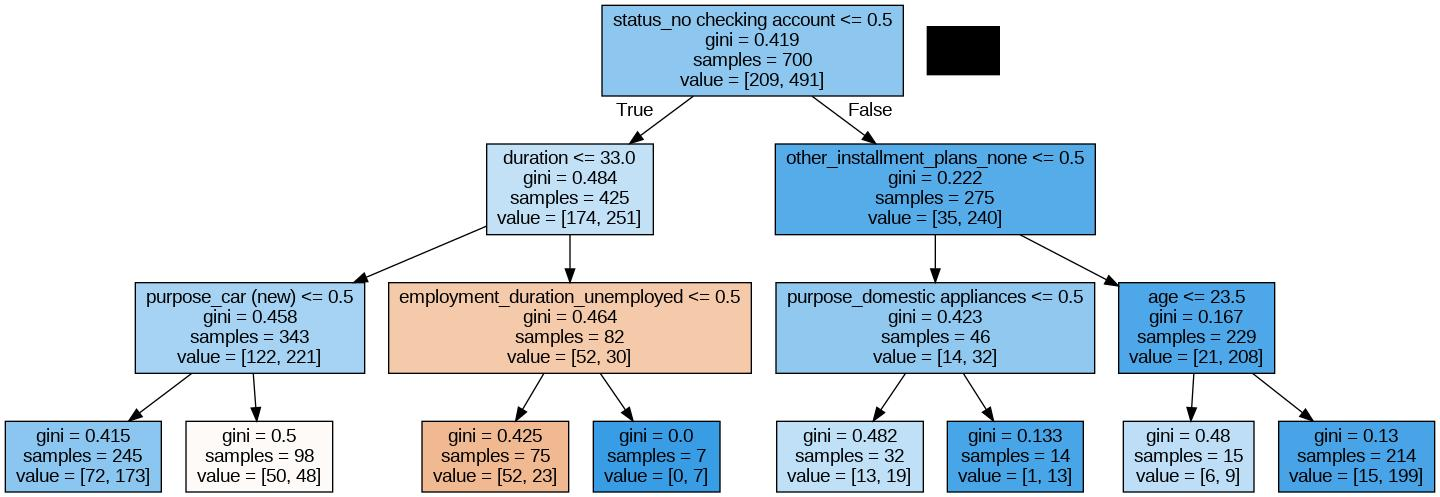

In [ ]:
#Read the create the image file

chd_tree_graph =pdot.graphviz.graph_from_dot_file( 'chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')
#Render the png file
Image(filename='chd_tree.png')


In [ ]:
gini_node_1=1 - pow(209/700,2)-pow(491/700,2)
print(round(gini_node_1,4))


0.4189


In [ ]:
clf_tree_entropy =DecisionTreeClassifier (criterion ='entropy', max_depth=3)
clf_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

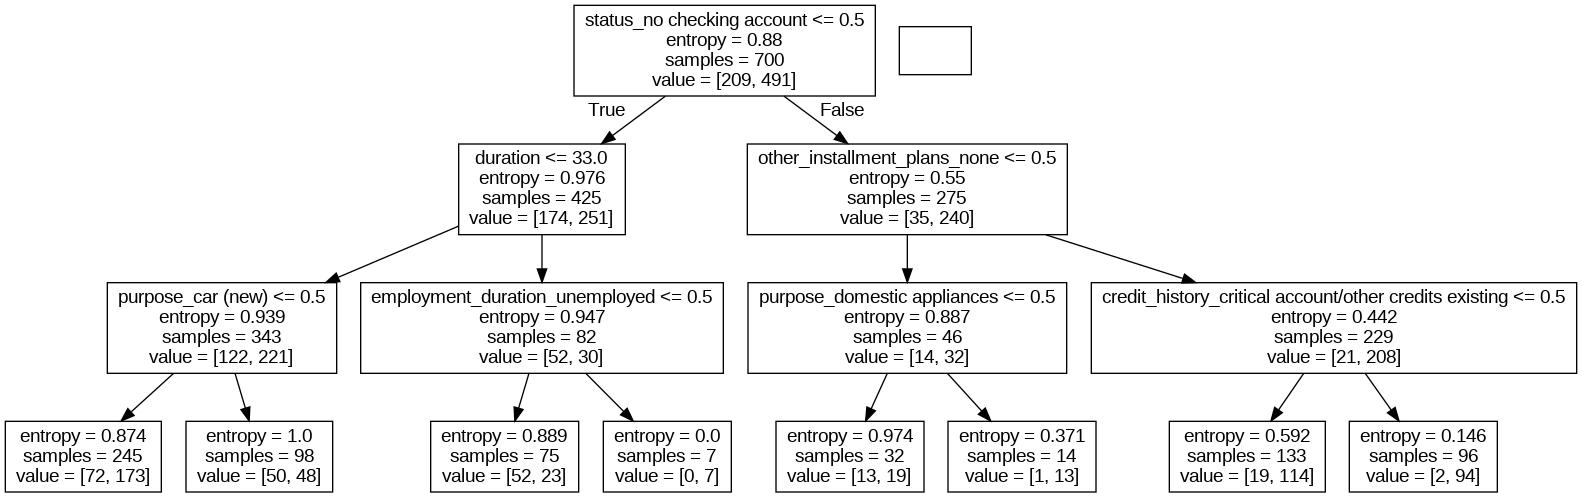

In [ ]:

#Export the tree into odt file
export_graphviz(clf_tree_entropy, out_file ="chd_tree_entropy.odt",feature_names =X_train.columns)
#Read the create the image file
chd_tree_graph= pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt')
chd_tree_graph.write_jpg('chd_tree_entropy.png')
#Render the png file
Image(filename="chd_tree_entropy.png")

In [ ]:

import math
entropy_node_1 = - (209/700) * math.log2(209/700) - (491/700) * math.log2(491/700)
print (round(entropy_node_1, 2))

0.88


In [ ]:

tree_predict =clf_tree_entropy.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)


0.5975866239024135

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

tuned_parameters =[{ 'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
clf_tree =DecisionTreeClassifier()
clf= GridSearchCV(clf_tree,
tuned_parameters,
cv=10,
scoring ='roc_auc')
clf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [ ]:

clf.best_score_


0.6927568027210884

In [ ]:

clf.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree =DecisionTreeClassifier (criterion='gini', max_depth=6)


In [ ]:
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6)

In [ ]:
from sklearn import metrics
tree_predict =clf_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)


0.6057363688942636

In [ ]:
#Displaying the Tree:


from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
#Export the tree into odt file
export_graphviz (clf_tree, out_file ="chd_tree.odt", feature_names =X_train.columns,filled=True)


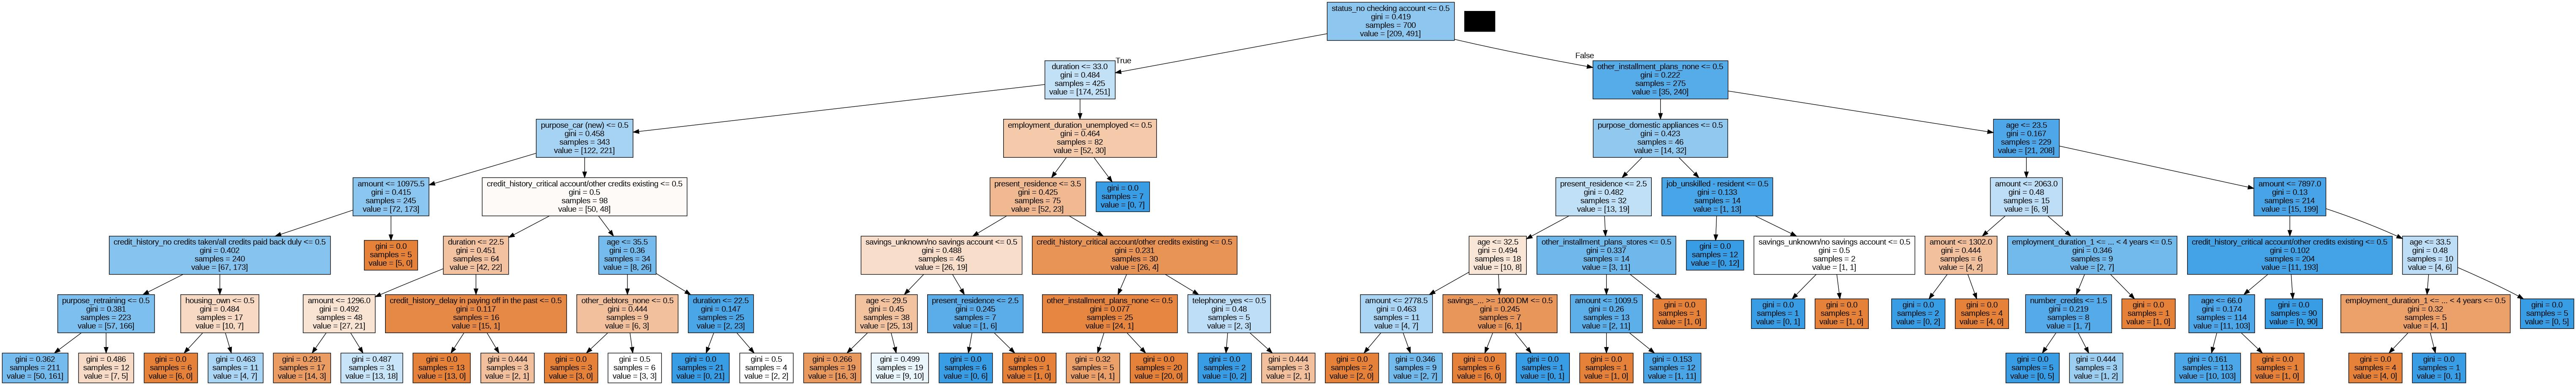

In [ ]:
#Read the create the image file

chd_tree_graph =pdot.graphviz.graph_from_dot_file( 'chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')
#Render the png file
Image(filename='chd_tree.png')
